In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
temp = pd.read_csv('temperature.csv')
#remore index column
df = temp.loc[temp['Country Name']=='Turkey']
#select the data of Turkey after 1982
# df = df.loc[df['Country Name'] == 'Turkey']
# df = df.loc[df['year'] > 1982] 
df = df.iloc[25:, 2:4]
#remove the index column
df = df.reset_index(drop=True)
df.head()



,year,tem_change
0,1986,0.412
1,1987,-0.411
2,1988,-0.320
3,1989,0.330
4,1990,-0.071


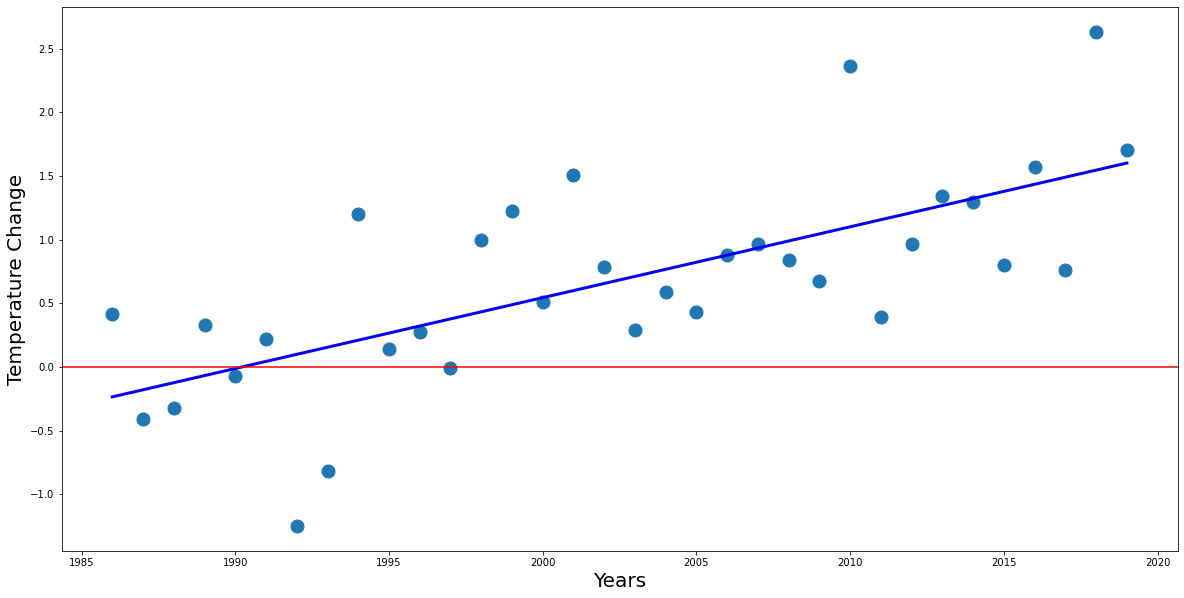

In [51]:
#apply regression model
from sklearn.linear_model import LinearRegression

#reshape the data
x = np.array(df['year']).reshape(-1, 1)
y = np.array(df['tem_change']).reshape(-1, 1)
#apply linear regression model
model = LinearRegression()
model.fit(x, y)
#predict the temperature change
y_pred = model.predict(x)
#plot the data
plt.figure(figsize=(20, 10))
plt.scatter(df['year'], df['tem_change'], s=170)
plt.plot(df['year'], y_pred, color='b', linewidth=3)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Temperature Change', fontsize=20)
# add a horizontal line at 0
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


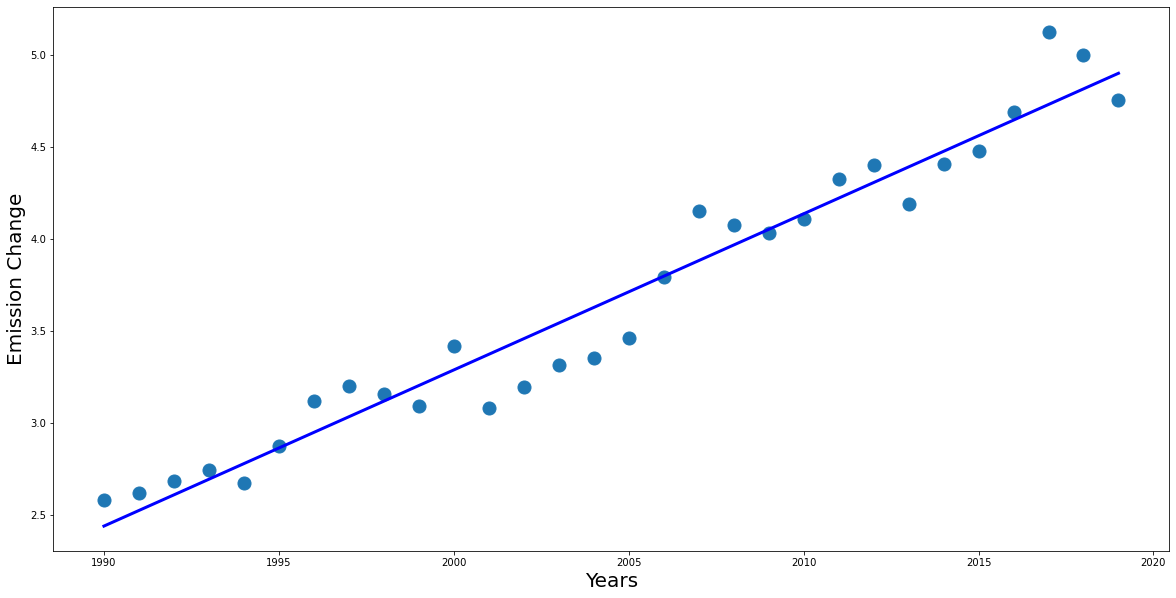

In [53]:
emission = pd.read_csv('emission.csv')
#reshape the data
x = np.array(emission['Year']).reshape(-1, 1)
y = np.array(emission['Change']).reshape(-1, 1)
#apply linear regression model
model.fit(x, y)
#predict the temperature change
y_pred2 = model.predict(x)
#plot the data
plt.figure(figsize=(20, 10))
plt.scatter(emission['Year'], emission['Change'], s=170)
plt.plot(emission['Year'], y_pred2, color='b', linewidth=3)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Emission Change', fontsize=20)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

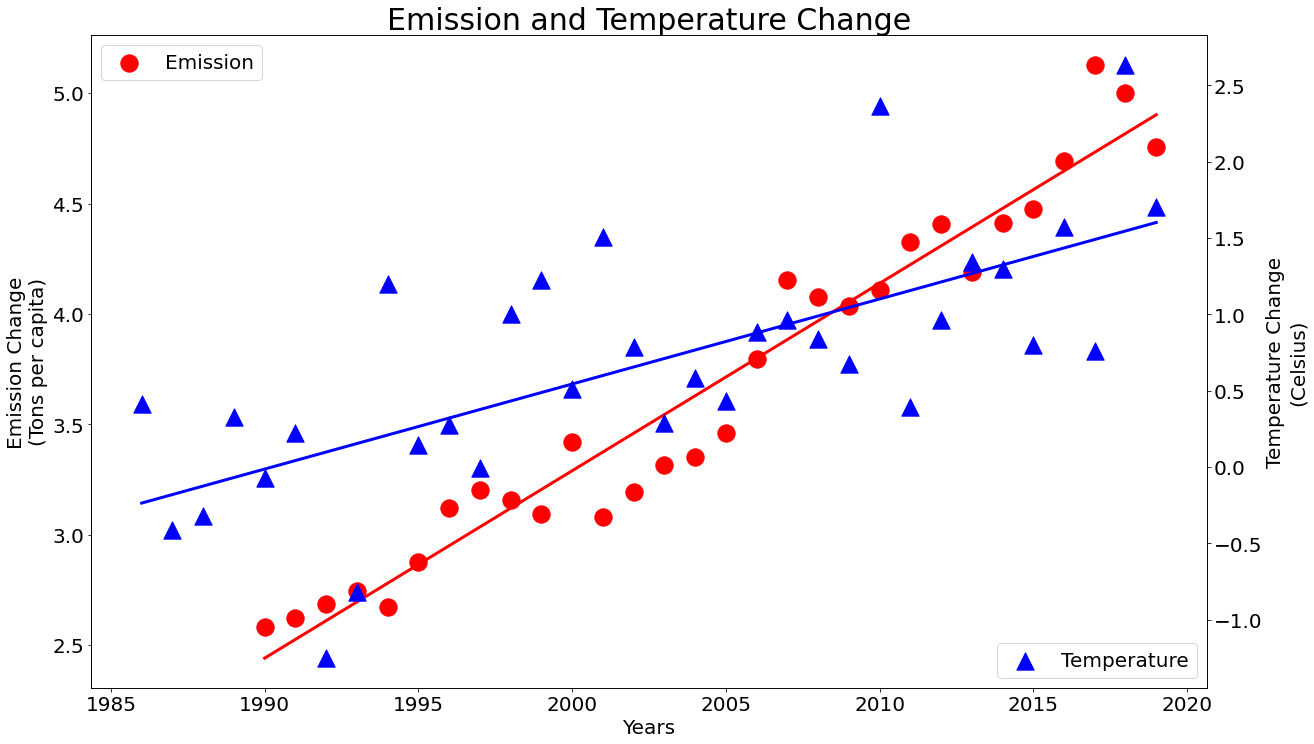

In [63]:
plt.figure(figsize=(20,12))
plt.scatter(emission.Year, emission.Change, color='r', label='Emission', s=300)
plt.plot(emission['Year'], y_pred2, color='r', linewidth=3)
plt.legend(loc='upper left', fontsize=20)
#plot the temperature data on different figure
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Years', fontsize=20)
#add two y labels
plt.ylabel('Emission Change\n(Tons per capita)', fontsize=20)
plt.twinx()
plt.ylabel('Temperature Change\n(Celsius)', fontsize=20)
plt.title('Emission and Temperature Change', fontsize=30)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.scatter(df['year'], df['tem_change'], label='Temperature', s=300, color='b', marker='^')
plt.plot(df['year'], y_pred, color='b', linewidth=3)
# add legends for two scatter plots
plt.legend(loc='lower right', fontsize=20)
plt.show()
